<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

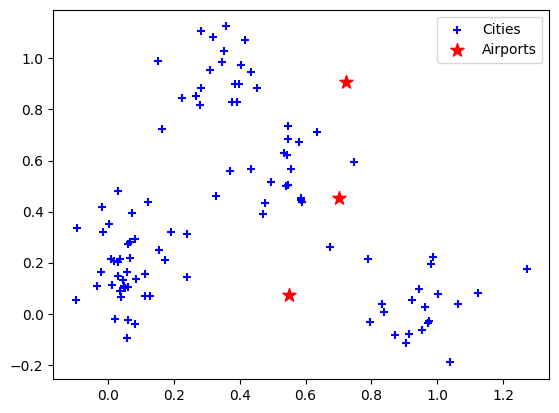

In [109]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

# gererating a set of 100 cities (cities' locations will not change)
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# generating initial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append([x,y]) 

# plotting the initial state
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

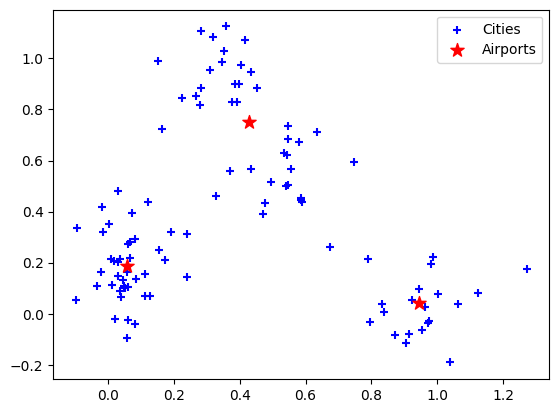

In [110]:
citylist = []
for x in cities:
    citylist.append(x)

def get_distance(airport, city):
    x = (city[0] - airport[0])**2
    y = (city[1] - airport[1])**2
    distance = np.sqrt(x+y)
    return distance

def close_cities():
    closest_cities_a1 = []
    closest_cities_a2 = []
    closest_cities_a3 = []
    for i in range(num_city):
        distance1 = get_distance(airports[0], citylist[i])
        distance2 = get_distance(airports[1], citylist[i])
        distance3 = get_distance(airports[2], citylist[i])

        if min(distance1, distance2, distance3) == distance1:
            closest_cities_a1.append(citylist[i])
        elif min(distance1, distance2, distance3) == distance2:
            closest_cities_a2.append(citylist[i])
        elif min(distance1, distance2, distance3) == distance3:
            closest_cities_a3.append(citylist[i])

    return closest_cities_a1, closest_cities_a2, closest_cities_a3

def sum_cities(airport_cities, airport):
    sumx = 0
    for i in range(len(airport_cities)):
        x = airport[0]-airport_cities[i][0]
        sumx += x
    sumx = sumx*2*.005
    sumy = 0
    for j in range(len(airport_cities)):
        y = airport[1]-airport_cities[j][1]
        sumy += y
    sumy = sumy*2*.005

    return sumx, sumy

def objfunc():
    a1, a2, a3 = close_cities()

    x1, y1 = sum_cities(a1, airports[0])
    x2, y2 = sum_cities(a2, airports[1])
    x3, y3 = sum_cities(a3, airports[2])

    update = [x1, y1, x2, y2, x3, y3]
    return update

def main():

    for i in range(1000):
        update = objfunc()
        airports[0][0] -= update[0]
        airports[0][1] -= update[1]
        airports[1][0] -= update[2]
        airports[1][1] -= update[3]
        airports[2][0] -= update[4]
        airports[2][1] -= update[5]    
        
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.show()

main()


In [111]:
# An optimal state
